# Init

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

%matplotlib inline

# Q-Learning & SARSA

In [2]:
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000

In [3]:
# DISCRETIZING CONTINUOUS SPACE
def create_bins():
    bins = np.zeros((2,20))
    bins[0] = np.linspace(-1.2, 0.6, 20)
    bins[1] = np.linspace(-0.07, 0.07, 20)
    return bins

# GIVEN OBSERVATION ARRAY AND BINS, RETURNS STATE NUMBER
def get_state(observation, bins):
    state = [None] * 2
    for i in range(2):
        state[i] = int(np.digitize(observation[i], bins[i]) - 1)
    return tuple(state)

## Q-Learning

In [5]:
#GET ACTION BY POLICY (e-GREEDY)
def get_action(Q, state, epsilon):
    if (np.random.uniform() < epsilon):
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

#PLAY SINGLE EPISODE - Q-Learning
def play_episode(Q, bins, epsilon):
    total_reward = 0

    observation = env.reset()
    state = get_state(observation, bins)
    
    for moves in range(MAX_MOVES):
        # e-GREEDY
        action = get_action(Q, state, epsilon)

        # TAKE ACTION
        observation, reward, done, _ = env.step(action)
        
        total_reward += reward

        # UPDATE Q-VALUES (greedify - Off policy)
        next_state = get_state(observation, bins)
        next_best_action = np.argmax(Q[next_state])
        next_best_Q = Q[next_state][next_best_action]
        Q[state][action] += (ALPHA * (reward + (GAMMA * next_best_Q) - Q[state][action]))

        state = next_state

        # BREAK IF TERMINATED
        if(done): break 

    return (round(total_reward), round(moves))

In [14]:
# INIT
MAX_STATES = 20 ** 2
MAX_MOVES = env._max_episode_steps #1000
NUM_EPISODES = 20000
GAMMA = 0.99
ALPHA = 0.1
EPSILON = 0.5 #OVERRIDDEN

Q = np.zeros((20, 20, env.action_space.n))
episode_rewards = []
episode_lengths = []
bins = create_bins()

In [15]:
#TRAINING

# progress = tqdm(range(NUM_EPISODES))
for episode_n in range(NUM_EPISODES):
    EPSILON = 1 / np.sqrt(episode_n + 1)
    if(EPSILON < 0.01): EPSILON = 0.01

    episode_reward, episode_length = play_episode(Q, bins, EPSILON)
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

    if(episode_n%1000 == 0):
        print("ITER: ",(episode_n),"\tREWARD: ",episode_reward ,"\tLENGTH: ",episode_length)

ITER:  0 	REWARD:  -1000 	LENGTH:  999
ITER:  1000 	REWARD:  -157 	LENGTH:  156
ITER:  2000 	REWARD:  -154 	LENGTH:  153
ITER:  3000 	REWARD:  -172 	LENGTH:  171
ITER:  4000 	REWARD:  -160 	LENGTH:  159
ITER:  5000 	REWARD:  -338 	LENGTH:  337
ITER:  6000 	REWARD:  -139 	LENGTH:  138
ITER:  7000 	REWARD:  -135 	LENGTH:  134
ITER:  8000 	REWARD:  -131 	LENGTH:  130
ITER:  9000 	REWARD:  -158 	LENGTH:  157
ITER:  10000 	REWARD:  -135 	LENGTH:  134
ITER:  11000 	REWARD:  -191 	LENGTH:  190
ITER:  12000 	REWARD:  -138 	LENGTH:  137
ITER:  13000 	REWARD:  -139 	LENGTH:  138
ITER:  14000 	REWARD:  -230 	LENGTH:  229
ITER:  15000 	REWARD:  -153 	LENGTH:  152
ITER:  16000 	REWARD:  -138 	LENGTH:  137
ITER:  17000 	REWARD:  -149 	LENGTH:  148
ITER:  18000 	REWARD:  -126 	LENGTH:  125
ITER:  19000 	REWARD:  -147 	LENGTH:  146


## SARSA

In [19]:
#GET ACTION BY POLICY (e-GREEDY)
def get_action(Q, state, epsilon):
    if (np.random.uniform() < epsilon):
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

#PLAY SINGLE EPISODE - SARSA
def play_episode(Q, bins, epsilon):
    total_reward = 0

    observation = env.reset()
    state = get_state(observation, bins)
    action = get_action(Q, state, epsilon)
    
    for moves in range(MAX_MOVES):

        # TAKE ACTION
        observation, reward, done, _ = env.step(action)
        next_state = get_state(observation, bins)
        # e-GREEDY
        next_action = get_action(Q, next_state, epsilon)

        total_reward += reward

        # UPDATE Q-VALUES (On policy)
        next_Q = Q[next_state][next_action]
        Q[state][action] += (ALPHA * (reward + (GAMMA * next_Q) - Q[state][action]))

        state, action = next_state, next_action

        # BREAK IF TERMINATED
        if(done): break 

    return (round(total_reward), round(moves))

In [20]:
# INIT
MAX_STATES = 20 ** 2
MAX_MOVES = env._max_episode_steps #1000
NUM_EPISODES = 10000
GAMMA = 0.99
ALPHA = 0.1
EPSILON = 0.5 #OVERRIDDEN

Q = np.zeros((20, 20, env.action_space.n))
episode_rewards = []
episode_lengths = []
bins = create_bins()

In [21]:
#TRAINING

# progress = tqdm(range(NUM_EPISODES))
for episode_n in range(NUM_EPISODES):
    EPSILON = 1 / np.sqrt(episode_n + 1)
    if(EPSILON < 0.01): EPSILON = 0.01

    episode_reward, episode_length = play_episode(Q, bins, EPSILON)
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

    if(episode_n%1000 == 0):
        print("ITER: ",(episode_n),"\tREWARD: ",episode_reward ,"\tLENGTH: ",episode_length)

ITER:  0 	REWARD:  -1000 	LENGTH:  999
ITER:  1000 	REWARD:  -240 	LENGTH:  239
ITER:  2000 	REWARD:  -163 	LENGTH:  162
ITER:  3000 	REWARD:  -148 	LENGTH:  147
ITER:  4000 	REWARD:  -141 	LENGTH:  140
ITER:  5000 	REWARD:  -135 	LENGTH:  134
ITER:  6000 	REWARD:  -206 	LENGTH:  205
ITER:  7000 	REWARD:  -116 	LENGTH:  115
ITER:  8000 	REWARD:  -133 	LENGTH:  132
ITER:  9000 	REWARD:  -135 	LENGTH:  134


### Testing for Q-Learning or SARSA

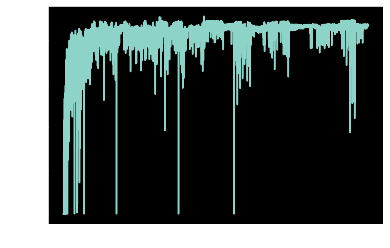

In [22]:
# PLOT REWARDS CURVE
plt.plot(np.arange(NUM_EPISODES), episode_rewards)

In [25]:
# TESTING
observation = env.reset()
state = get_state(observation, bins)
for moves in tqdm(range(MAX_MOVES)):
    env.render()
    action = np.argmax(Q[state])
    # TAKE ACTION
    observation, reward, done, _ = env.step(action)
    state = get_state(observation, bins)
    
    if(done):
        print("MOVES: ",moves)
        break

env.close()

14%|█▍        | 140/1000 [00:02<00:14, 57.76it/s]MOVES:  140

